In [21]:
# import libraries

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np, pandas as pd
from scipy.stats import bernoulli, binom, poisson, gamma, weibull_min
import seaborn as sns
import ipywidgets as widgets


In [22]:
# Warnings are issued during the calculation of the distributions.
# These are switched off here
import warnings
warnings.filterwarnings('ignore')

In [23]:
#Assignment 1.1

# Calculate Expected Value of single Bernoulli trial
# expected value of x
p = float(input("Enter probability value: "))
print(p)
def expectedVal(p):
    return bernoulli.mean(p)
print("The expected value is: ", expectedVal(p))

Enter probability value: 0.84
0.84
The expected value is:  0.84


In [24]:
#In terms of percentage
print(f"The percentage of 'Vote For' is {p*100:.0f}%")
print(f"The percentage of 'Vote Against' is {(1-p)*100:.0f}%")

The percentage of 'Vote For' is 84%
The percentage of 'Vote Against' is 16%


Text(0.5, 1.0, 'Bernoulli Distribution')

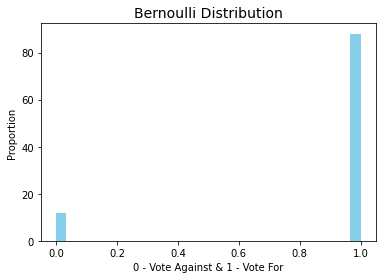

In [25]:
bernoulli_dist = bernoulli.rvs(p=p,size=100)

bernoulli_dist_plot = sns.distplot(bernoulli_dist ,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
bernoulli_dist_plot.set(xlabel='0 - Vote Against & 1 - Vote For', ylabel='Proportion')
bernoulli_dist_plot.set_title('Bernoulli Distribution', fontdict={'fontsize': 14, 'fontweight': 'medium'})

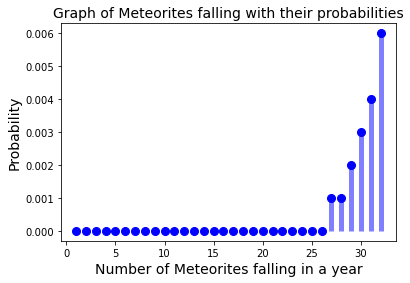

In [32]:
# Assignment 1.2

ep=0.0
k=1
mu = 46
while ep < 0.005:
    ep = poisson.pmf(k,mu)
    #print(mx, np.round(ep,5))
    k+=1

#Plotting the graph

fig, ax = plt.subplots(1, 1)
x = np.arange(1,k)
mu = 46
ax.plot(x, np.round(poisson.pmf(x, mu),3), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, np.round(poisson.pmf(x, mu),3), colors='b', lw=5, alpha=0.5)

#Formatting visuals
ax.set_title('Graph of Meteorites falling with their probabilities', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.xlabel('Number of Meteorites falling in a year',fontsize=14)
plt.ylabel('Probability',fontsize=14)

plt.show()

46.0


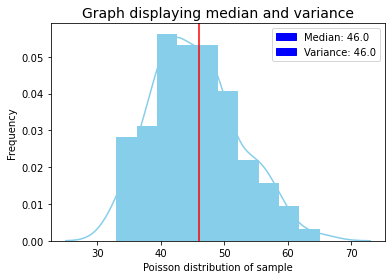

In [33]:
data_binom = poisson.rvs(mu=46, size=100) # Took 100 samples
ax = sns.distplot(data_binom,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 5,'alpha':1})
plt.axvline(x=poisson.median(mu, loc=0),
            color='red')
ax.set(xlabel='Poisson distribution of sample', ylabel='Frequency')
ax.set_title('Graph displaying median and variance', fontdict={'fontsize': 14, 'fontweight': 'medium'})
#Display median and variance
median= poisson.median(mu, loc=0)
var = poisson.var(mu, loc=0)

print(median)
median_patch = mpatches.Patch(color='blue', label=f'Median: {median}')
var_patch = mpatches.Patch(color='blue', label=f'Variance: {var}')
plt.legend(handles=[median_patch,var_patch])

plt.show()

In [39]:
# SEction 1c

#Find the probability that you need to wait between 2 and 4 hours to hear the owl 
#Since we are calculating wait time then P(T<t) = 1-F(t)

c2= (0.30*np.exp(-0.5*2)) + (0.69*np.exp(-0.25*2)) # calcuate function value for 2 hours
c4 = (0.30*np.exp(-0.5*4)) + (0.69*np.exp(-0.25*4)) # calcuate function value for 4 hours
p2 = 1-c2
p4 = 1-c4
print(p4-p2)

0.2344325881738707


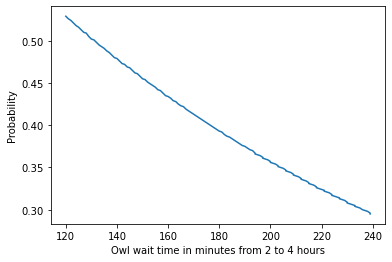

In [35]:
y=np.arange(2,4,0.0166)
min_array=[]
probab_array=[]
for ey in np.round(y,2):
    p = (0.30*np.exp(-0.5*ey)) + (0.69*np.exp(-0.25*ey))
    min_array.append(int(np.round(ey*60 , 0)))
    probab_array.append(np.round(p,3))

df = pd.DataFrame({'Minutes':min_array, 'Probability':probab_array})
plt.plot(df.Minutes,df.Probability)
plt.ylabel('Probability')
plt.xlabel('Owl wait time in minutes from 2 to 4 hours')
plt.show()

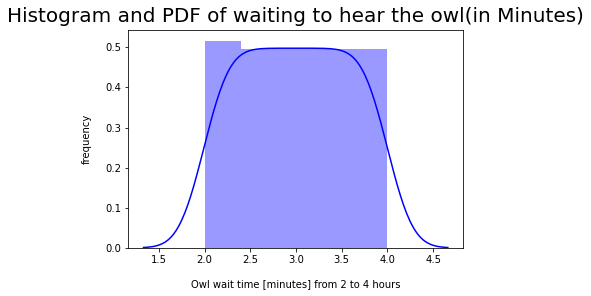

In [37]:

x = np.arange(2,4,0.0166) #creating range from 2 hours to 4 hours by minute
y = (0.30*np.exp(-0.5*x)) + (0.69*np.exp(-0.25*x))

plt.xlabel("Owl wait time [minutes] from 2 to 4 hours", labelpad=14)
plt.ylabel("frequency", labelpad=14)
plt.title("Histogram and PDF of waiting to hear the owl(in Minutes)", fontsize=20, y=1.01);
sns.distplot(x, kde=True, color='b', hist_kws={"range": [2, 4]})

plt.show()